In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/train.csv')

In [7]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.iloc[:, 1:].values.reshape(-1, 28, 28)
y = df.iloc[:, 0].values

In [9]:
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [8]:
X = X.astype('float32') / 255.0

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

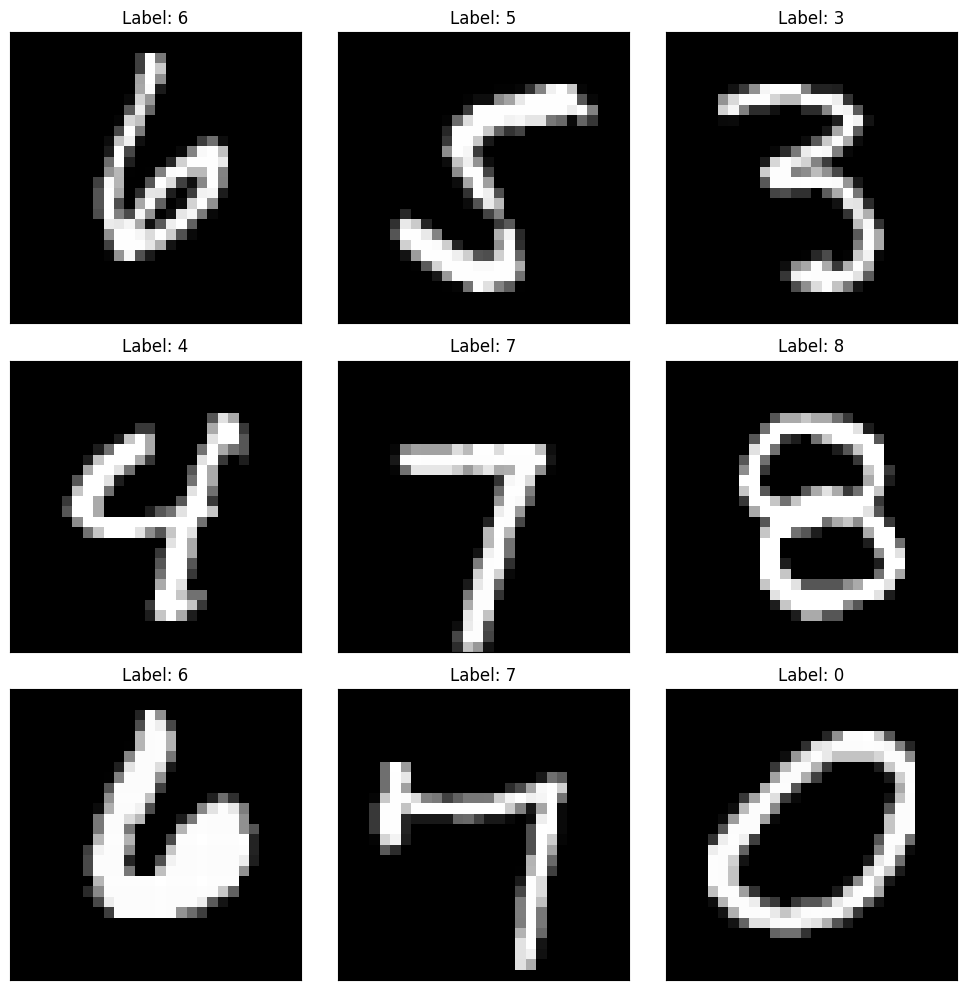

In [13]:
def plot_digits(images, labels):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    for i, (ax, image, label) in enumerate(zip(axes.flatten(), images, labels)):
        ax.imshow(image, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'Label: {label}')
    plt.tight_layout()
    plt.show()

plot_digits(X_train[:9], y_train[:9])

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
1050/1050 [==============================] - 7s 6ms/step - loss: 0.1916 - accuracy: 0.9424 - val_loss: 0.0972 - val_accuracy: 0.9707
Epoch 2/15
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0622 - accuracy: 0.9802 - val_loss: 0.0640 - val_accuracy: 0.9815
Epoch 3/15
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0381 - accuracy: 0.9881 - val_loss: 0.0623 - val_accuracy: 0.9804
Epoch 4/15
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.0545 - val_accuracy: 0.9843
Epoch 5/15
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0164 - accuracy: 0.9950 - val_loss: 0.0573 - val_accuracy: 0.9825
Epoch 6/15
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0664 - val_accuracy: 0.9807
Epoch 7/15
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0655 - val_accuracy:

In [34]:
## Prediction
df_pred = pd.read_csv('data/test.csv')

In [20]:
X_for_pred = df_pred.values.reshape(-1, 28, 28)
X_for_pred = X_for_pred.astype('float32') / 255.0

predictions = model.predict(X_for_pred)
predicted_digits = np.argmax(predictions, axis=1)

875/875 [==============================] - 1s 1ms/step


In [35]:
df_pred['Label'] = predicted_digits
df_pred['ImageId'] = df_pred.index + 1
df_pred = df_pred[['ImageId', 'Label']]

In [36]:
df_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [37]:
df_pred.to_csv('results.csv', index=False)